In [1]:
import numpy as np
import csv
import os
import matplotlib.pyplot as plt
import pandas as pd
import math
import scipy
# import scipy.signal


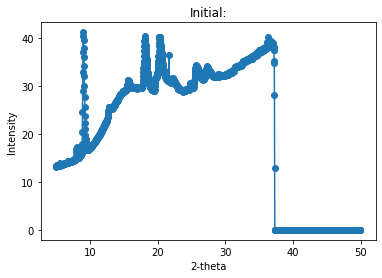

Processed 1751 lines.


In [5]:
'''Open the csv file and plot the first and last frames of the data (columns 1 and 30). The columnnumbers will need to be adjusted
if the data file of interest is not 30 frames.'''
with open('B1_MAPbI2Br_Dark60min.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    x=[]
    y=[]
    z=[]
    for row in csv_reader:
        if line_count == 0:
#             print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            x.append(float(row[0]))
            y.append(float(row[1]))
            z.append(float(row[23]))
            line_count += 1
    plt.plot(x,y, marker='o')
    plt.title('Initial:')
    plt.xlabel('2-theta')
    plt.ylabel('Intensity')
    plt.show()
    print(f'Processed {line_count} lines.')

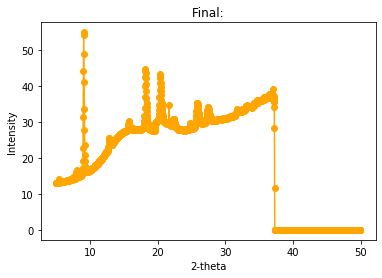

In [6]:
plt.plot(x,z, marker='o',color='orange')
plt.title('Final:')
plt.xlabel('2-theta')
plt.ylabel('Intensity')
plt.show()
#print(f'Processed {line_count} lines.')

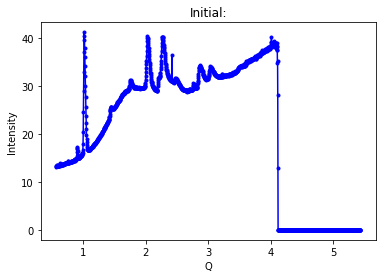

In [24]:
'''Converting the 2-theta data into a lattice spacing in Angstroms and converting angstoms to Q'''

import math
result=[(((((9.763E-11)/(2*math.sin(math.radians(row/2)))*1e10)**-1)*2)*math.pi) for row in x]
plt.plot(result,y, marker='.',color='blue')
plt.title('Initial:')
plt.xlabel('Q')
plt.ylabel('Intensity')
plt.show()


In [8]:
'''Calculating the maximum intensity and figuring out where that maximum value is in terms of '''
maxValue=np.max(y)
# print(maxValue)
index=y.index(maxValue)
lspace=result[index]
lspace2=x[index]
print('lattice spacing=', lspace, 'Angstroms')
print(lspace2)

lattice spacing= 0.1613868323148095 Angstroms
9.037


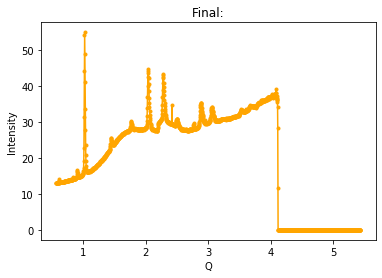

In [23]:
'''Converting the 2-theta data into a lattice spacing in Angstroms and converting angstoms to Q'''

import math
result=[(((((9.763E-11)/(2*math.sin(math.radians(row/2)))*1e10)**-1)*2)*math.pi) for row in x]
plt.plot(result,z, marker='.',color='orange')
plt.title('Final:')
plt.xlabel('Q')
plt.ylabel('Intensity')
plt.show()

        

Lattice Spacing= [0.1613868323148095, 0.3849663563694626, 0.6362834688960652, 0.6384751343807065, 0.6515571927000752] in Angstroms
Intensity= [41.195, 36.489, 39.179, 40.171, 38.963]


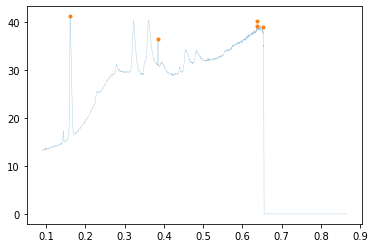

In [9]:
# import scipy; print(scipy.__version__)
# from scipy.signal import find_peaks
# peaks, _= find_peaks(y,threshold=0.6)
# plt.plot(result, y, lw=0.4, alpha=0.4 )
# # print(peaks[3])

# newY=[]
# newX=[]
# for i in peaks:
#     newX.append(result[i])
#     newY.append(y[i])
# print('Lattice Spacing=', newX, 'in Angstroms')
# print('Intensity=', newY)

# plt.plot(newX,newY, marker="o", ls="", ms=3 )

# plt.show()

'''2 theta calculations for peaks'''
'''------------------------------'''

# import scipy; print(scipy.__version__)
from scipy.signal import find_peaks
peaks, _= find_peaks(y,threshold=0.6)
plt.plot(result, y, lw=0.4, alpha=0.4 )
# print(peaks[3])

newY=[]
newX=[]
for i in peaks:
    newX.append(result[i])
    newY.append(y[i])
print('Lattice Spacing=', newX, 'in Angstroms')
print('Intensity=', newY)

plt.plot(newX,newY, marker="o", ls="", ms=3 )

plt.show()

In [10]:
def nums(howMany):
    indices=[]
    millInd=[]
    for l in range(howMany):
        for k in range(howMany):
            for h in range(1,howMany):
                indices.append([h,k,l])
                millInd.append(math.sqrt((h**2)+(l**2)+(k**2)))
    return(indices,millInd)

def filterPeaks(newX):
    validPeaks=[]
    for i in newX:
        counter=0
        for q in nums(4)[1]:
            if abs(q-(lspace/i)) <.05:
                #abs(lspace2-(i/q)) < .05:
                validPeaks.append([i,q,abs(q-(lspace/i)),nums(4)[0][counter]])
                counter+=1
            else:
                counter+=1
    return(validPeaks)
                 
            
    

In [11]:

# print(nums(4)[0][10])
# print(nums(4)[1])
#[i for i in results if i not in validpeaks]
result= filterPeaks(newX)
print(result)
#[i for i in results if i not in validpeaks]

[[0.1613868323148095, 1.0, 0.0, [1, 0, 0]]]


In [12]:
>>> A = [6, 7, 8, 9, 10, 11, 12]
>>> subset_of_A = set([6, 9, 12])
>>> [i for i in A if i not in subset_of_A]
[7, 8, 10, 11]

[7, 8, 10, 11]

In [13]:
# def getRidofDups(peaks):
#     newList=[]
#     counter=0
#     for i in result:
#         if newList==[] or i[1] not in newList[counter]:
#             newList.append(i)
#             counter+=1
#         else: 
#             counter+=1
#     return newList

In [14]:
# getRidofDups(result)

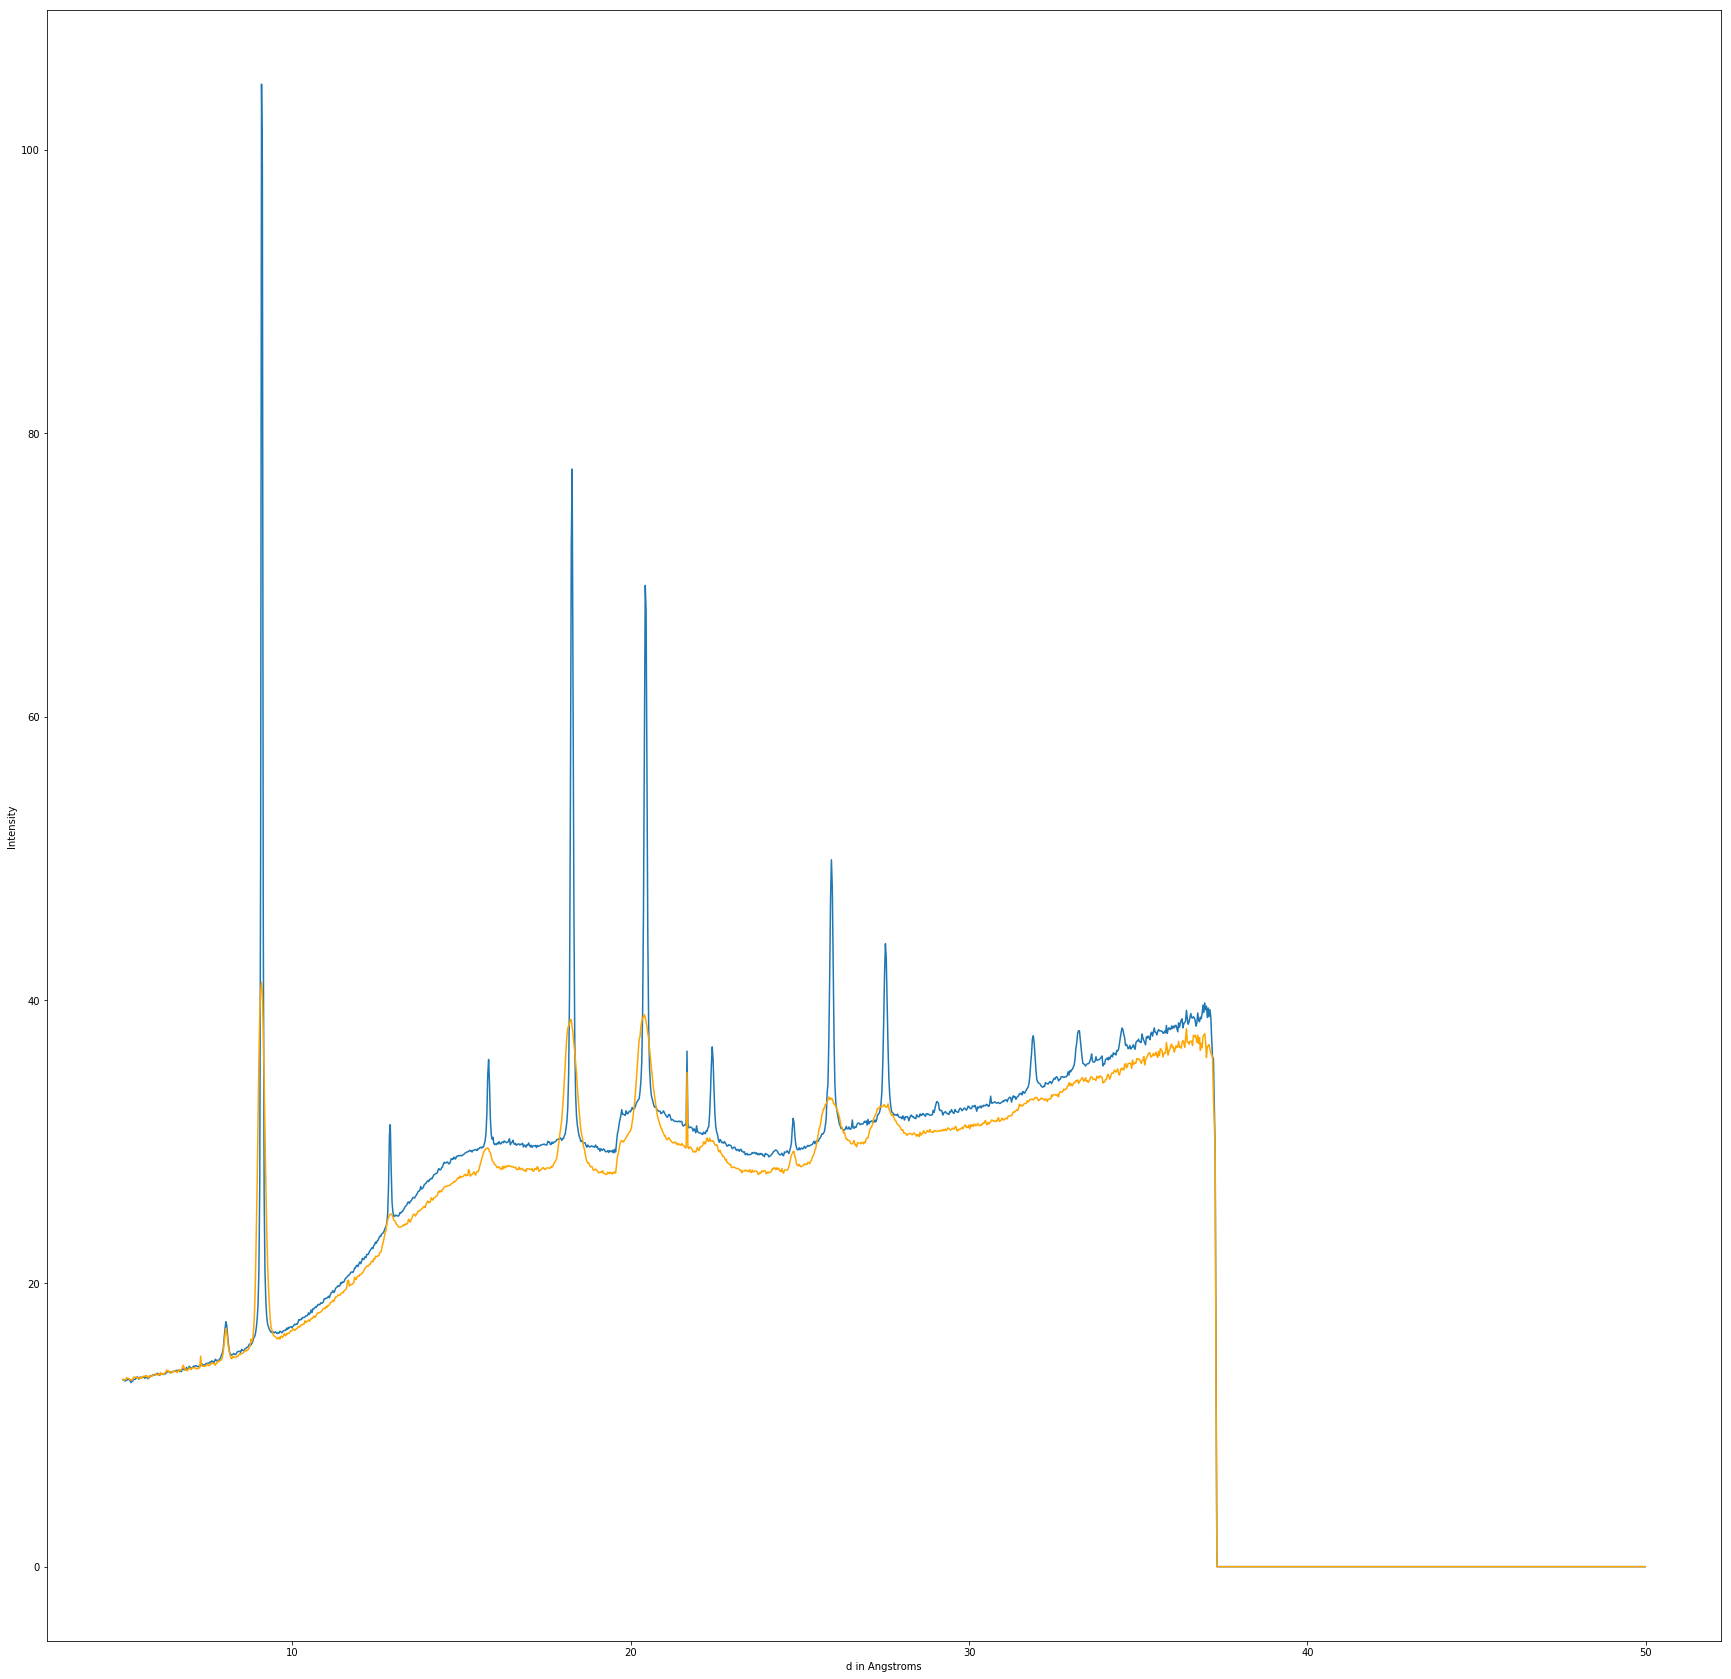

In [35]:
plt.plot(x,y)
plt.plot(x,z,color='orange')
plt.xlabel('d in Angstroms')
plt.ylabel('Intensity')
plt.rcParams["figure.figsize"] = (30,30)

In [36]:
with open('data.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    noheaders=[]
    for row in csv_reader:
        if line_count == 0:
#             print(f'Column names are {", ".join(row)}')
            line_count += 1
        else:
            noheaders.append(row)
    print(noheaders)

[['5', '12.906', '13.112', '12.905', '13.263', '13.16', '12.946', '12.803', '12.996', '12.869', '12.734', '13.089', '12.839', '12.904', '13.152', '12.906', '13.159', '12.892', '13.258', '13.173', '12.921', '13.236', '13.112', '12.97', '12.818', '13.03', '12.948', '13.045', '12.885', '12.78', '12.883', '', ''], ['5.022', '12.853', '13.214', '12.985', '13.345', '13.14', '12.892', '12.931', '13.166', '12.947', '12.958', '13.085', '12.94', '12.912', '13.209', '12.911', '13.103', '12.989', '13.237', '13.238', '12.955', '13.32', '13.153', '13.13', '12.828', '13.117', '12.98', '13.142', '12.891', '12.968', '12.936', '', ''], ['5.045', '12.99', '13.304', '13.001', '13.315', '13.215', '12.932', '12.972', '13.18', '13.078', '13.076', '13.13', '13.02', '12.933', '13.073', '12.897', '13.128', '12.946', '13.201', '13.259', '13.127', '13.248', '13.204', '13.162', '12.8', '13.104', '13.137', '13.216', '12.89', '12.933', '13.048', '', ''], ['5.067', '12.891', '13.19', '12.942', '13.311', '13.125', '12

In [37]:
# array=range(30)
# maxvals=[]
# print(noheaders[:0])
# for row in range(30):
#     maxim = np.max(noheaders[:row])
#     maxvals.append(maxim)

# new=[]
# for n in noheaders:
#     if n != '':
#         new.append(n)
yoyo = np.array(noheaders)
yoyo = yoyo[:,0:-2]
# print(yoyo)

newNH =[]
for i in yoyo:
    subList=[]
    for n in i:
        subList.append(float(n))
    newNH.append(subList)
# print(newNH)
bitch=np.array(newNH)
print(bitch)
maxes=bitch.max(0)
print(maxes)

[[ 5.    12.906 13.112 ... 12.885 12.78  12.883]
 [ 5.022 12.853 13.214 ... 12.891 12.968 12.936]
 [ 5.045 12.99  13.304 ... 12.89  12.933 13.048]
 ...
 [49.932  0.     0.    ...  0.     0.     0.   ]
 [49.955  0.     0.    ...  0.     0.     0.   ]
 [49.977  0.     0.    ...  0.     0.     0.   ]]
[ 49.977 582.287 623.749 623.442 627.502 603.832 594.403 603.843 606.028
 619.218 606.469 604.838 613.741 606.981 577.943 580.967 592.08  594.359
 600.932 618.371 622.801 622.046 587.613 570.28  564.342 560.187 557.463
 571.06  586.289 597.387 604.745]


In [38]:
lame=[]
dumb=[]
for i in maxes:
    for k in newNH:
        if i in k:
            a=k.index(i)
            b=newNH
            lame.append([a,i])
            dumb.append([a,b])
        else:
            pass

In [39]:
print(lame)
# print(dumb)

[[0, 49.977], [1, 582.287], [2, 623.749], [3, 623.442], [4, 627.502], [5, 603.832], [6, 594.403], [7, 603.843], [8, 606.028], [9, 619.218], [10, 606.469], [11, 604.838], [12, 613.741], [13, 606.981], [14, 577.943], [15, 580.967], [16, 592.08], [17, 594.359], [18, 600.932], [19, 618.371], [20, 622.801], [21, 622.046], [22, 587.613], [23, 570.28], [24, 564.342], [25, 560.187], [26, 557.463], [27, 571.06], [28, 586.289], [29, 597.387], [30, 604.745]]


ValueError: x and y can be no greater than 2-D, but have shapes (30,) and (30, 2000, 31)

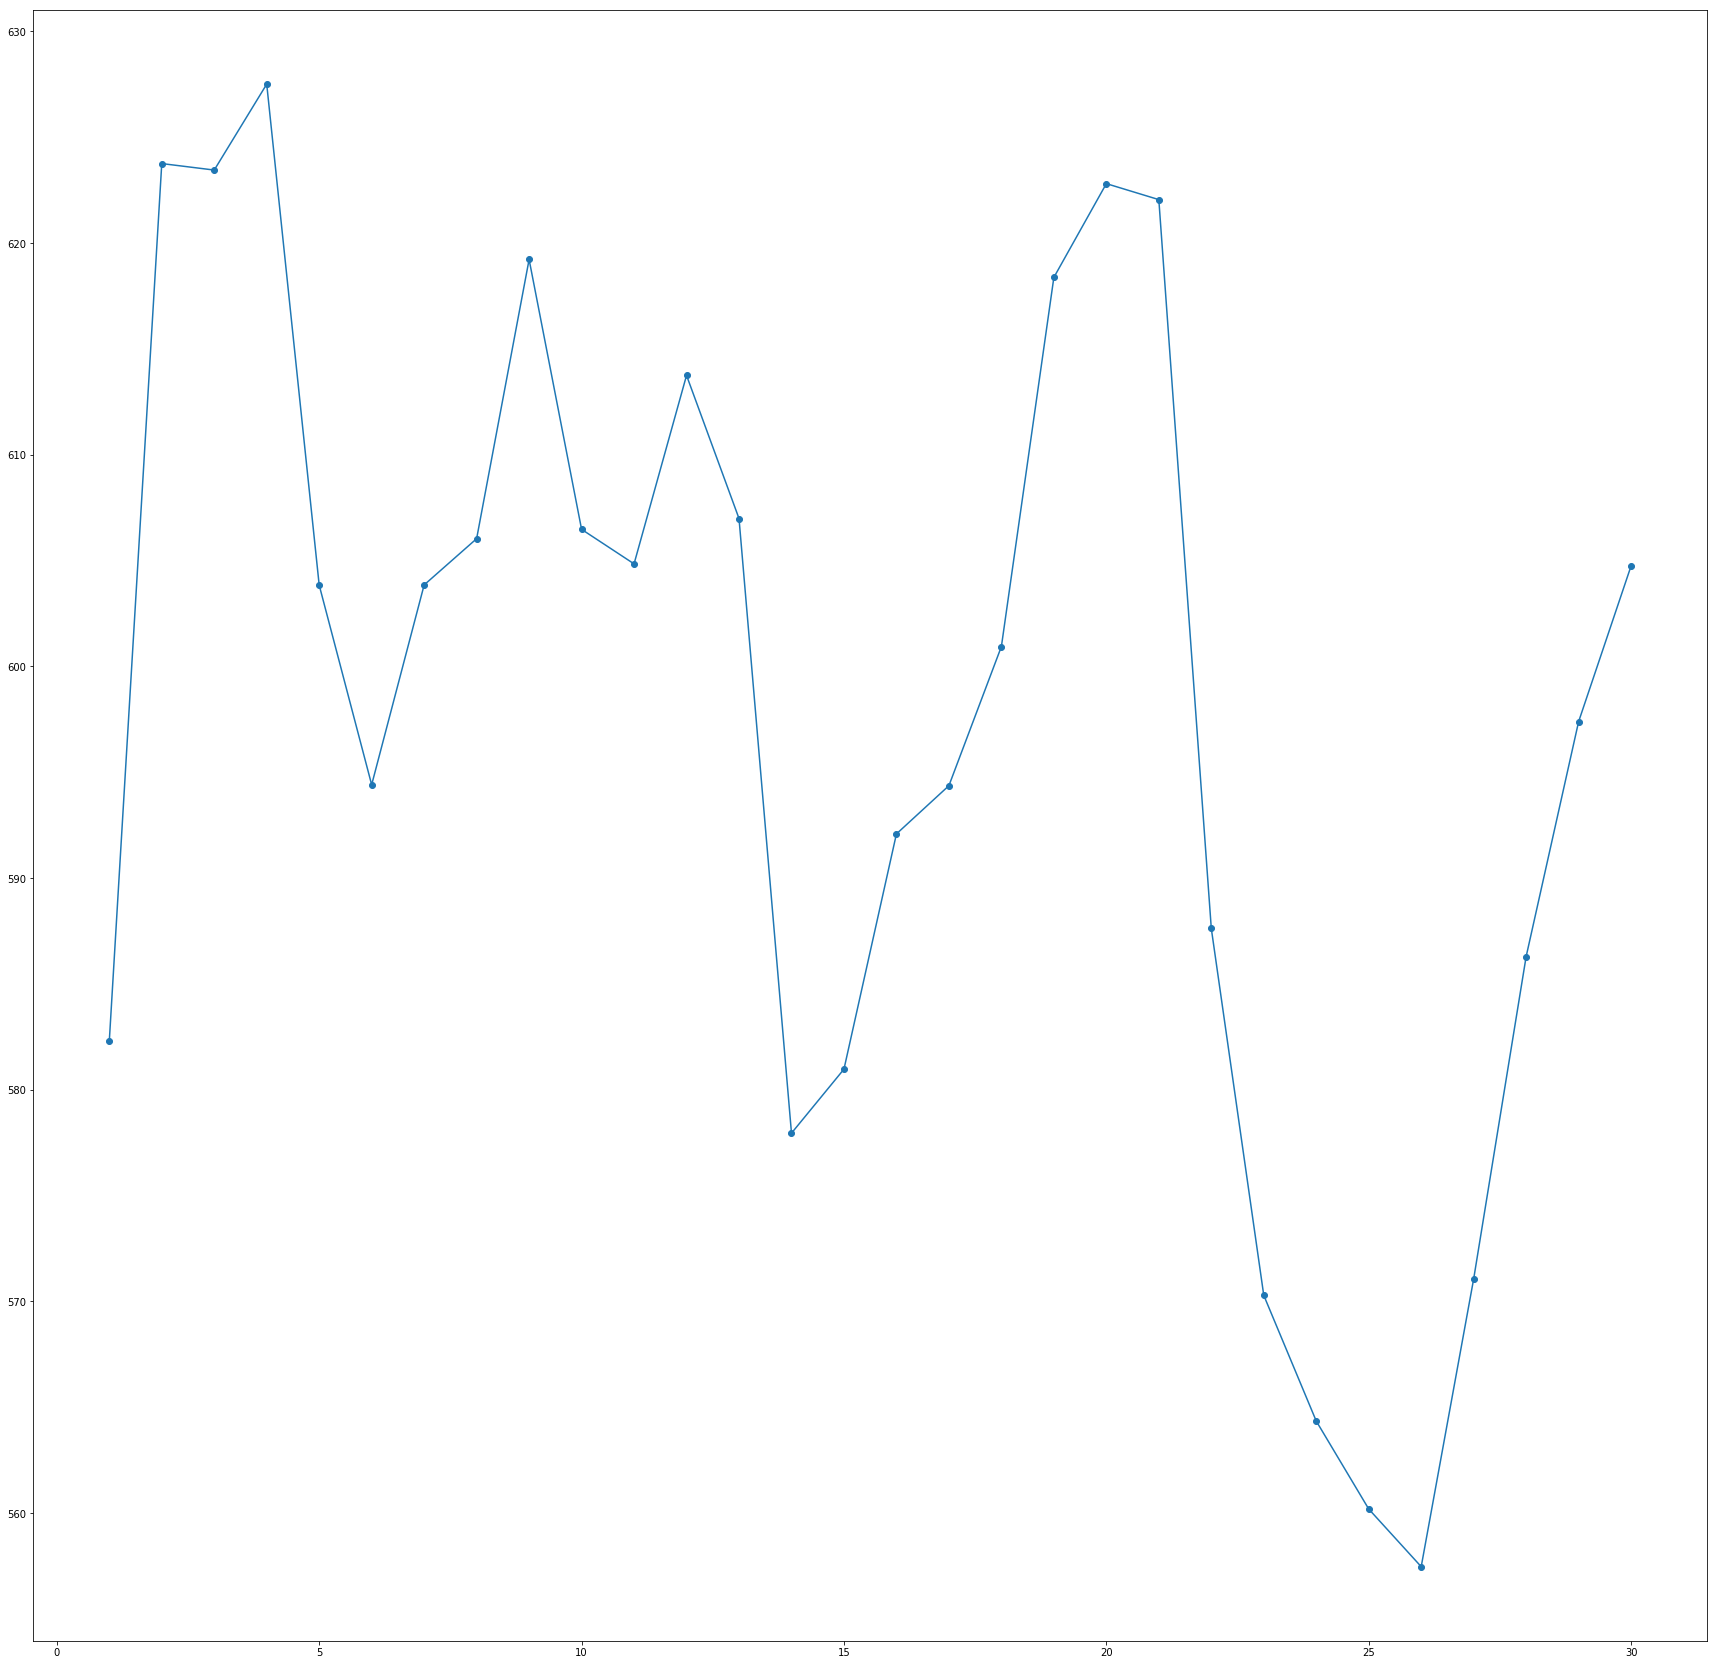

In [40]:
x=[]
y=[]
counter=0
for i in lame:
    if counter !=0:
        x.append(i[0])
        y.append(i[1])
    else:
        counter+=1

a=[]
b=[]
counter=0
for i in dumb:
    if counter !=0:
        a.append(i[0])
        b.append(i[1])
    else:
        counter+=1
        
plt.plot(x,y,marker='o')
plt.plot(a,b,color='orange')
plt.xlabel('Time (in frame number)')
plt.ylabel('Intensity')
plt.savefig('IntensityvsFrame.png')